In [1]:
path = r'C:\Users\Riccardo\Desktop\PhD_docs\Drought_prediction\Project\Indices_analysis\data'

In [60]:
import os
import pandas as pd
import re
import glob

files  = [f for f in os.listdir(path) if f.endswith('.csv')]

In [113]:
final_df = pd.DataFrame()

for spi in ['07', '10', '15']:
    csvlist = [os.path.join(path,f) for f in os.listdir(path) if re.match(r'(.*)(spi_gamma_{})(.*)'.format(spi), f)]
    for f in csvlist:
        with open(os.path.join(path,f),'rb') as csv_file:
            df = pd.read_csv(csv_file, sep=',', index_col=0)
            df['product'] = re.search(r'(.*)(spi_gamma_{}_)(\w+)_.csv'.format(spi), os.path.join(path,f)).group(3)
            df['var'] = re.search(r'(.*)(spi_gamma_{})_(\w+)_.csv'.format(spi), os.path.join(path,f)).group(2)
            final_df = final_df.append(df, ignore_index=True)

### Using average of all products

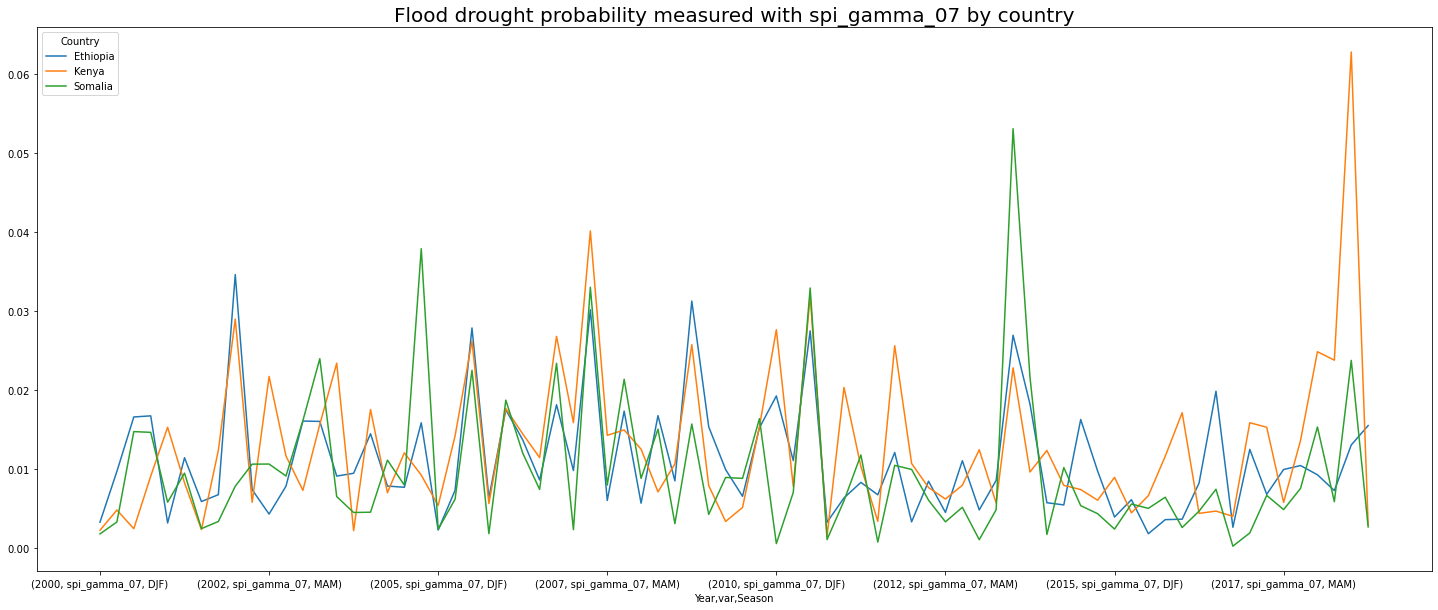

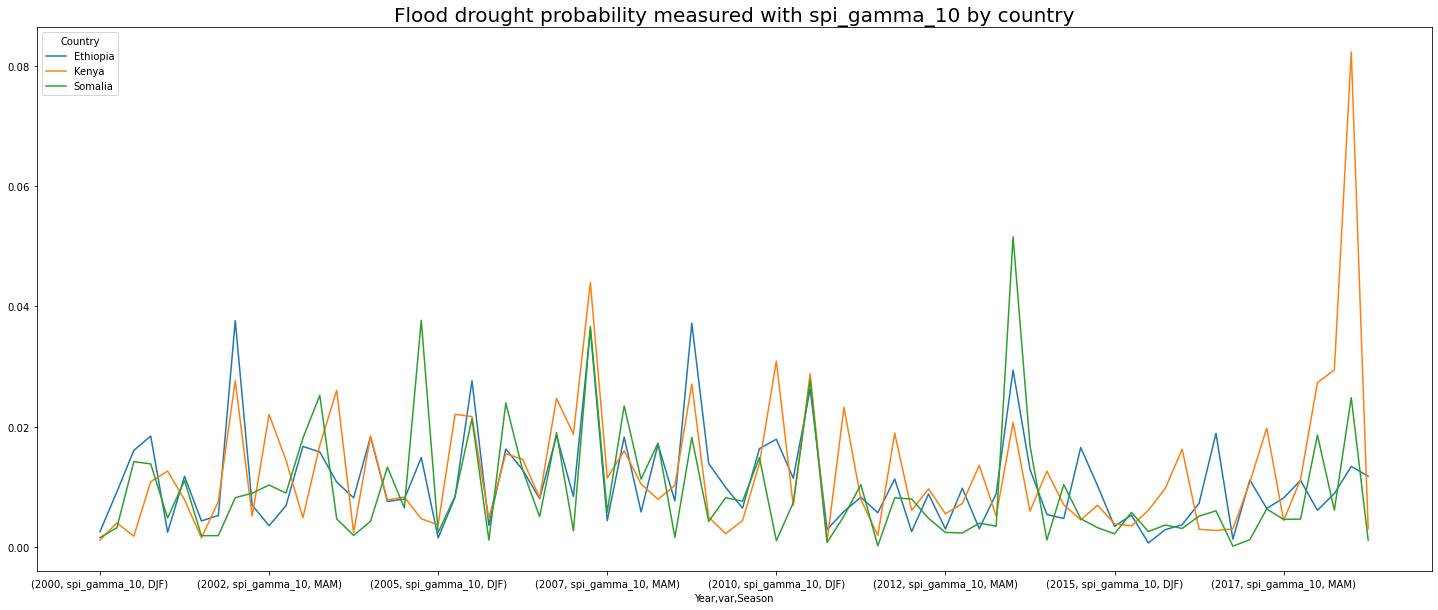

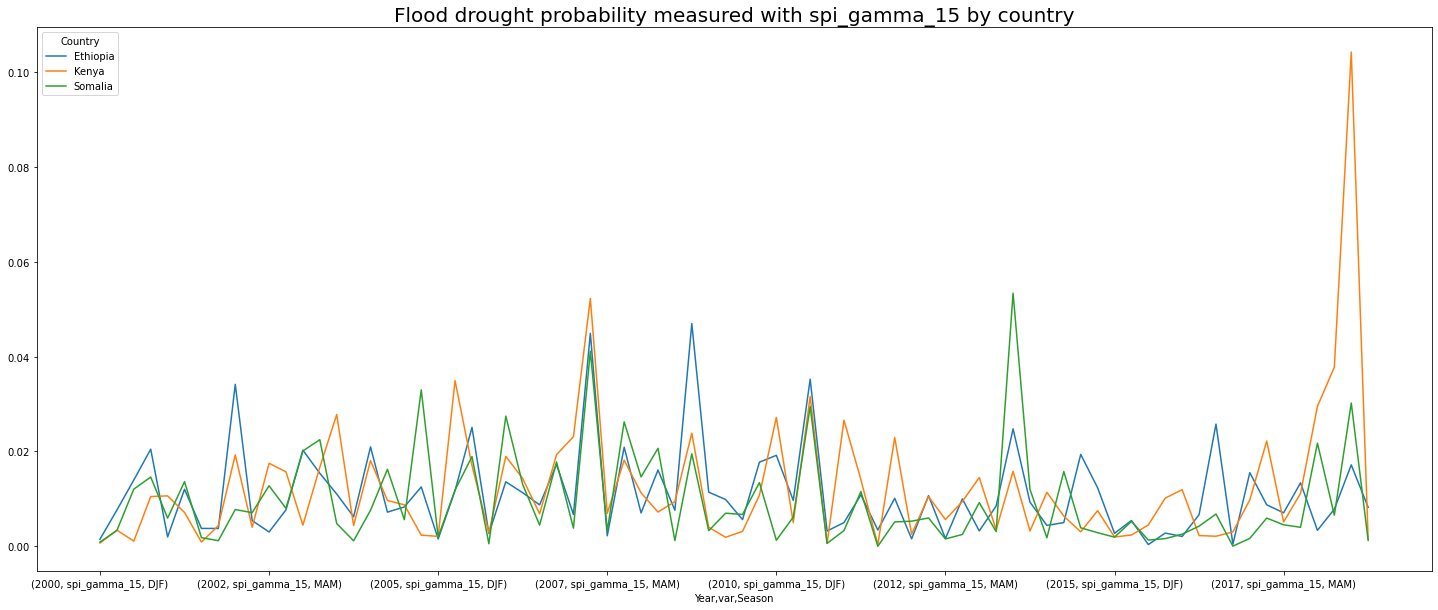

In [153]:
for var in final_df['var'].unique():
    # plot data
    fig, ax = plt.subplots(figsize=(25,10))
    final_df.loc[final_df['var']==var].groupby(['Year','var','Season','Country']).mean()['WD'].unstack().plot(ax=ax)
    plt.title('Flood drought probability measured with {} by country'.format(var), fontsize=20)

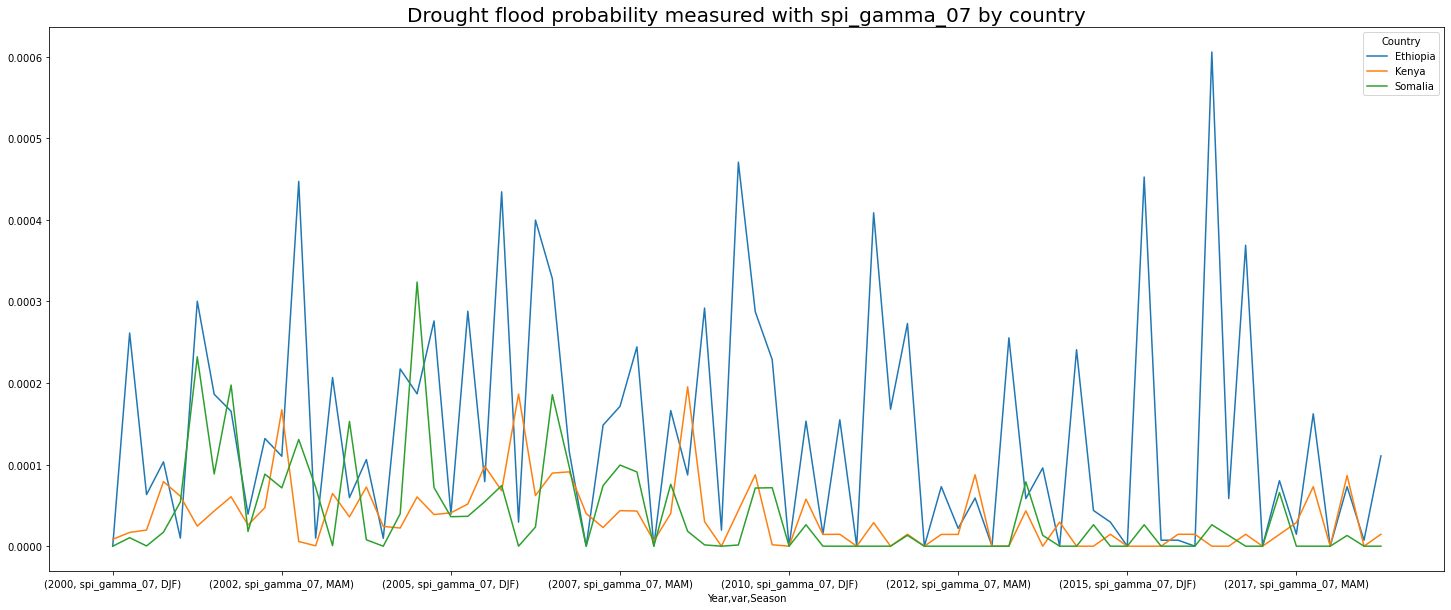

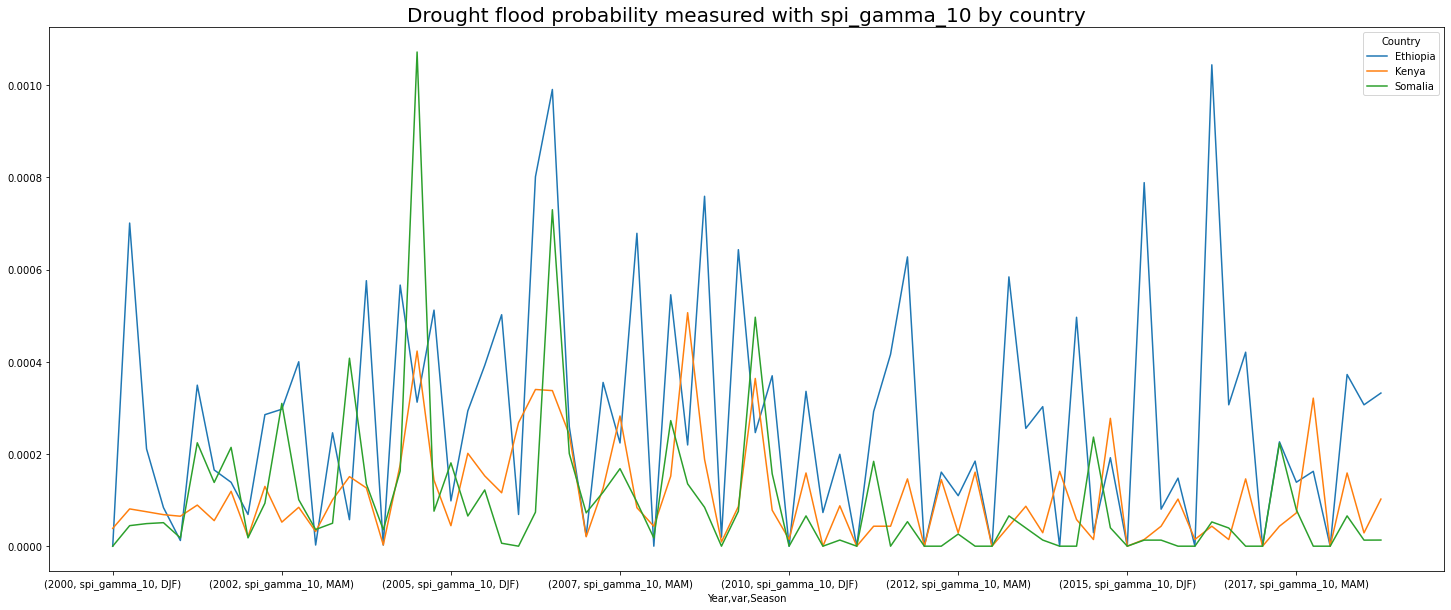

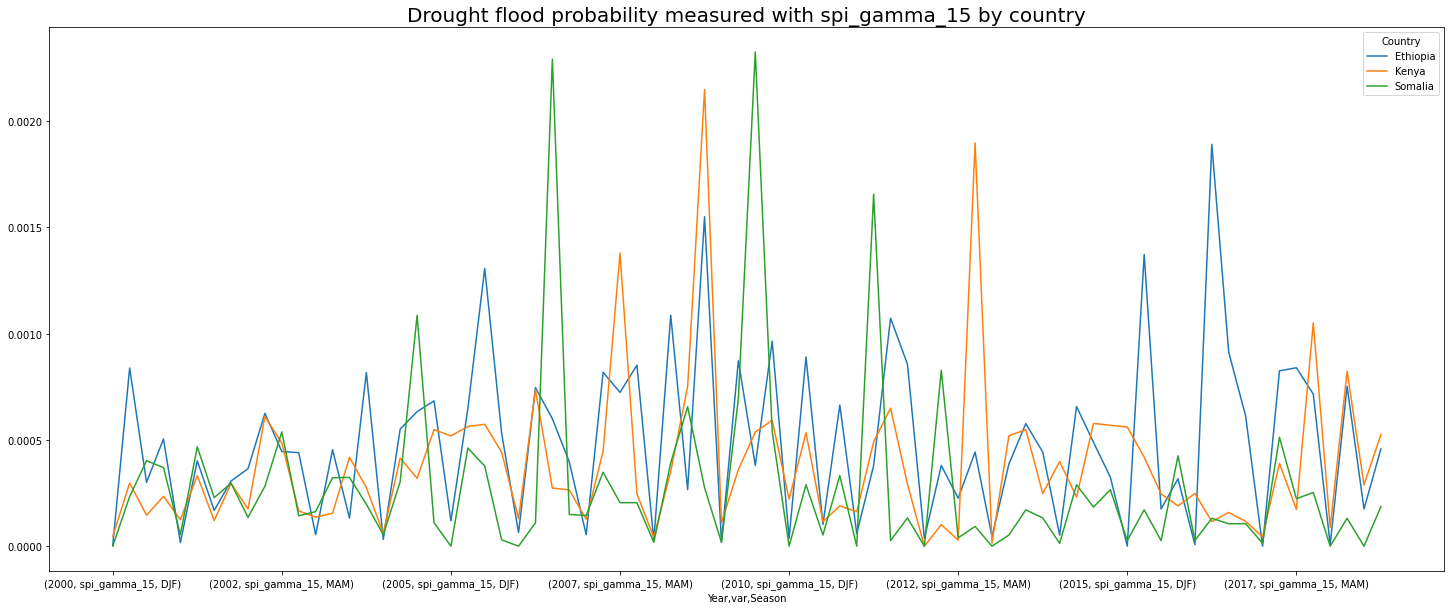

In [154]:
for var in final_df['var'].unique():
    # plot data
    fig, ax = plt.subplots(figsize=(25,10))
    final_df.loc[final_df['var']==var].groupby(['Year','var','Season','Country']).mean()['DW'].unstack().plot(ax=ax)
    plt.title('Drought flood probability measured with {} by country'.format(var), fontsize=20)

In [156]:
final_df.to_csv(r'C:\Users\Riccardo\Desktop\PhD_docs\Drought_prediction\Project\Indices_analysis\data\final_data.csv')